In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create an engine to connect to the SQLite database
engine = create_engine(r"sqlite:///C:\Users\zarap\OneDrive\UofT BootCamp\Class Project\sqlalchemy-challenge\SurfsUp\Resources\hawaii.sqlite")

# Reflect the existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session to link Python to the database
session = Session(engine)


C:\Users\zarap\AppData\Local\Temp\ipykernel_8448\1732564755.py:17: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [2]:
# Query for the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most recent date in the dataset: {most_recent_date}")


Most recent date in the dataset: 2017-08-23


In [3]:
# Calculate the date 12 months prior to the most recent date
import datetime as dt
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
                            .filter(Measurement.date >= one_year_ago)\
                            .order_by(Measurement.date).all()

# Convert to DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'Precipitation'])
precipitation_df.set_index('date', inplace=True)
precipitation_df = precipitation_df.sort_index()


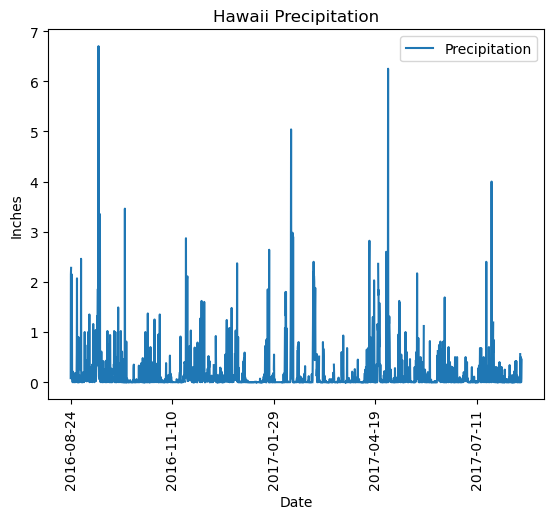

In [4]:
# Plot the results
precipitation_df.plot(rot=90, legend=True)
plt.title("Hawaii Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()  # Placing the legend at the right top location
plt.show()


In [5]:
# Print summary statistics
print(precipitation_df.describe())


       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [6]:
# Query the most active station
active_stations = session.query(Measurement.station, func.count(Measurement.id))\
                         .group_by(Measurement.station)\
                         .order_by(func.count(Measurement.id).desc()).all()

most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")


Most active station: USC00519281


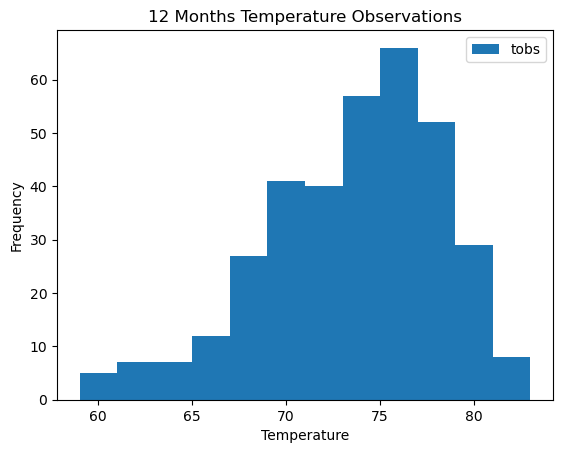

In [7]:
# Query the temperature observations for the most active station in the last 12 months
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station)\
                                           .filter(Measurement.date >= one_year_ago).all()

# Convert to DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])

# Plot a histogram
tobs_df.plot.hist(bins=12)
plt.title("12 Months Temperature Observations")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Close the session
session.close()
